First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing values in the dataset:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Encoded 'Species' column:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           

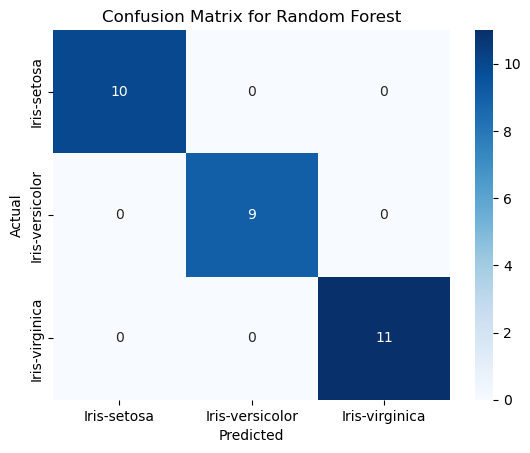


Classification Report for Random Forest:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Training and Evaluating Support Vector Machine (SVM) model...

Accuracy of Support Vector Machine (SVM): 100.00%

Confusion Matrix for Support Vector Machine (SVM):


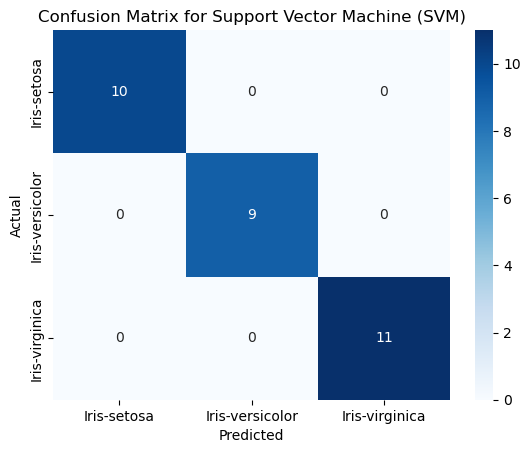


Classification Report for Support Vector Machine (SVM):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Training and Evaluating K-Nearest Neighbors (KNN) model...

Accuracy of K-Nearest Neighbors (KNN): 100.00%

Confusion Matrix for K-Nearest Neighbors (KNN):


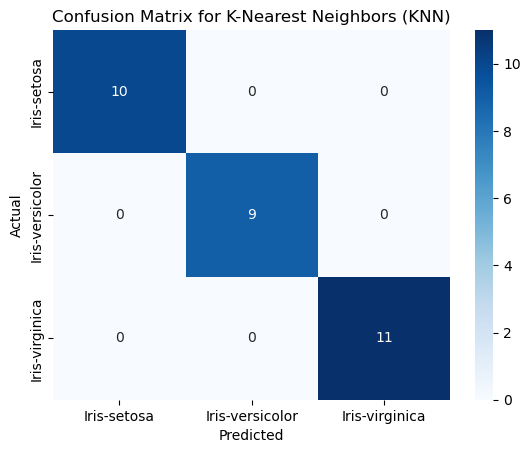


Classification Report for K-Nearest Neighbors (KNN):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Training and Evaluating Logistic Regression model...

Accuracy of Logistic Regression: 100.00%

Confusion Matrix for Logistic Regression:


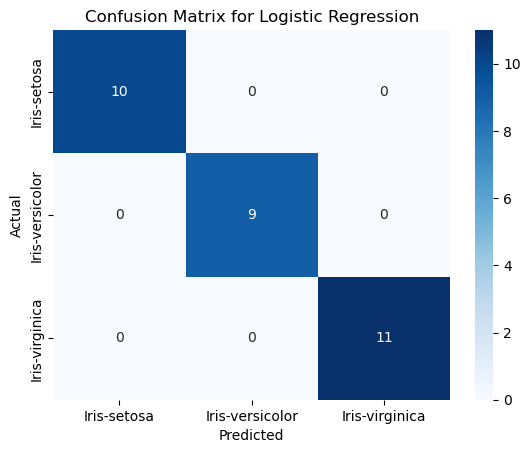


Classification Report for Logistic Regression:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



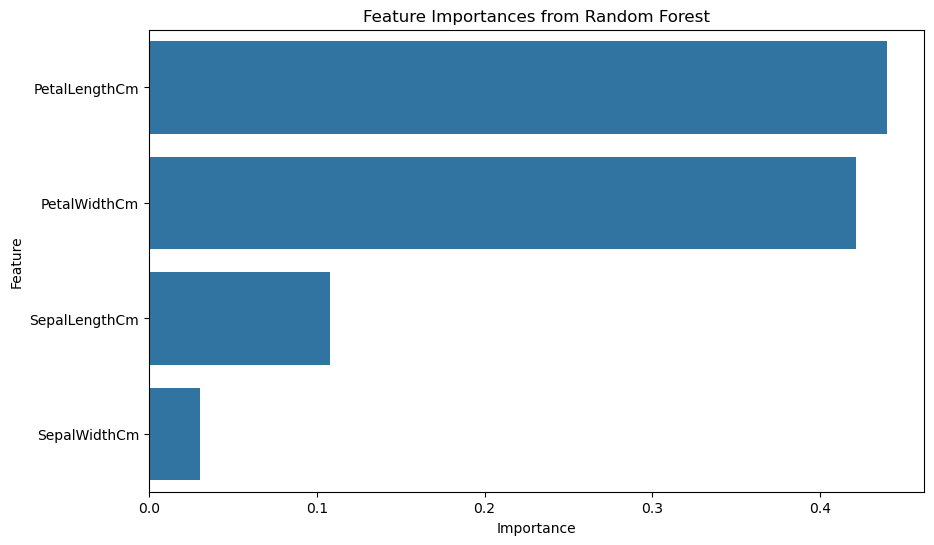

['iris_flower_model.pkl']

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Step 1: Load the dataset
# Assuming the dataset is stored in a CSV file (replace 'iris.csv' with the actual file path)
url = "Iris.csv"  # Replace this with the path to your dataset

# Load the data into a pandas DataFrame
df = pd.read_csv(url)

# Inspecting the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Preprocessing the data

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Encode the categorical 'Species' column into numeric values using LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
print("\nEncoded 'Species' column:")
print(df.head())

# Step 3: Splitting the data into features and target
X = df.drop(columns=['Id', 'Species'])  # Features (excluding Id and Species columns)
y = df['Species']  # Target variable (Species)

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose and Train Models

# Initialize the classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200)
}

# Step 6: Train and Evaluate Models
for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name} model...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy of {model_name}: {accuracy * 100:.2f}%")
    
    # Confusion Matrix
    print(f"\nConfusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 7: Visualize feature importance (for Random Forest)

# Feature importance visualization for Random Forest model
rf_model = models['Random Forest']
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

# Optional: You can save the model to a file for later use
import joblib
joblib.dump(rf_model, 'iris_flower_model.pkl')
